<a href="https://colab.research.google.com/github/Eserhimas/time_series/blob/main/time_series_classification_barbeque_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
from google.colab import drive

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [49]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



*  CustomerDOB: Date of birth
*  




In [98]:
# https://www.kaggle.com/datasets/thedevastator/weather-prediction/data

path = '/content/drive/MyDrive/Datasets/3- Time Series Datasets/weather_prediction_dataset.csv'
path_bbq = '/content/drive/MyDrive/Datasets/3- Time Series Datasets/weather_prediction_bbq_labels.csv'


data = pd.read_csv(path)
data_bbq = pd.read_csv(path_bbq)
data.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-1.8,2.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5


In [84]:
missing_prct = data.isnull().sum()*100/len(data)

if missing_prct.any() !=0:
  print(f'Percentage of Missing Values: {missing_prct}')
else:
  print('There is no missing values.')

There is no missing values.


In [99]:
data['DATE'] = pd.to_datetime(data['DATE'], format='%Y%m%d')
data.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,2000-01-01,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,2000-01-02,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,2000-01-03,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,2000-01-04,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,2000-01-05,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-1.8,2.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5


In [107]:
columns_to_keep = ['DATE']

df2 = data.filter(regex='DATE|BASEL')

In [109]:
df2['bbq'] = data_bbq['BASEL_BBQ_weather']

<ipython-input-109-a53c8740f354>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bbq'] = data_bbq['BASEL_BBQ_weather']


In [110]:
df2.head()

,DATE,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,bbq
0,2000-01-01,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,3.9,False
1,2000-01-02,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,4.8,False
2,2000-01-03,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,4.8,False
3,2000-01-04,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,7.5,False
4,2000-01-05,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,8.6,False


In [111]:
df2['bbq'] = df2['bbq'].map({True:1, False:0})

<ipython-input-111-44dedba80e0d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bbq'] = df2['bbq'].map({True:1, False:0})


In [112]:
X = df2.drop(['DATE','bbq'], axis = 1)
y = df2['bbq']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1642)

In [113]:
model = Sequential([
        Dense(X_train.shape[1], activation="relu"),
        Dense(X_train.shape[1]/2, activation="relu"),
        Dense(1, activation = 'sigmoid'),
    ])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [114]:
model.fit(x=X_train,
          y=y_train,
          epochs=150,
          validation_data=(X_test, y_test), verbose=0
          )

<Axes: >

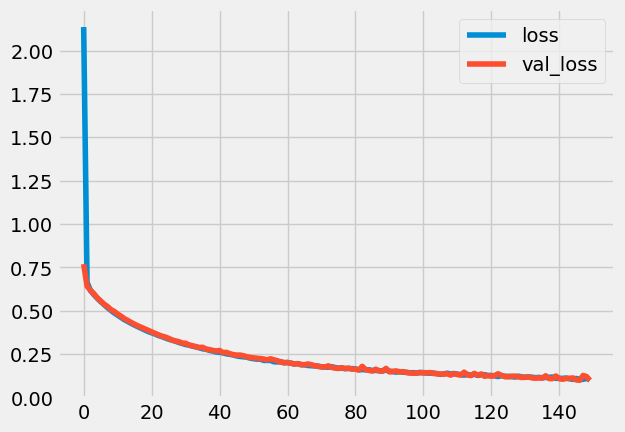

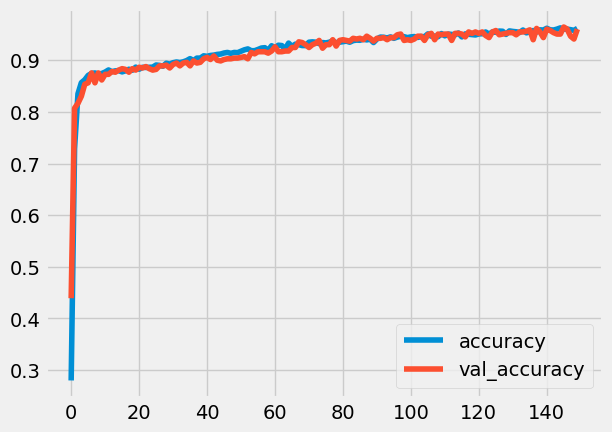

In [115]:
model_loss_acc = pd.DataFrame(model.history.history)
model_loss_acc[['loss', 'val_loss']].plot()
model_loss_acc[['accuracy', 'val_accuracy']].plot()

In [116]:
preds = np.round(model.predict(X_test))
print(classification_report(y_test,preds))

23/23 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       561
           1       0.92      0.91      0.91       170

    accuracy                           0.96       731
   macro avg       0.95      0.94      0.94       731
weighted avg       0.96      0.96      0.96       731



<Axes: >

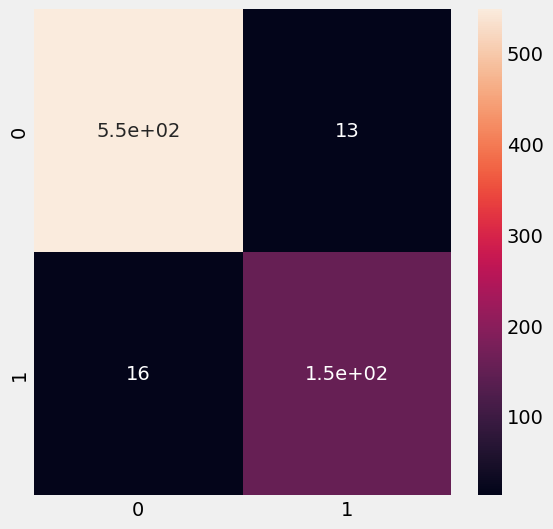

In [118]:
plt.figure(figsize = (6,6))
sns.heatmap(confusion_matrix(y_test, preds), annot = True)
